In [1]:
import pandas as pd
import os
os.getcwd()

'C:\\Users\\user\\Documents\\Coursera\\Week 2 Intro to optimization and efficient frontier'

In [2]:
ind=pd.read_csv("data\\ind30_m_vw_rets.csv", index_col=0, header=0, parse_dates=True)/100
ind.head()

,Food,Beer,Smoke,Games,Books,Hshld,Clths,Hlth,Chems,Txtls,...,Telcm,Servs,BusEq,Paper,Trans,Whlsl,Rtail,Meals,Fin,Other
192607,0.0056,-0.0519,0.0129,0.0293,0.1097,-0.0048,0.0808,0.0177,0.0814,0.0039,...,0.0083,0.0922,0.0206,0.0770,0.0193,-0.2379,0.0007,0.0187,0.0037,0.0520
192608,0.0259,0.2703,0.0650,0.0055,0.1001,-0.0358,-0.0251,0.0425,0.0550,0.0814,...,0.0217,0.0202,0.0439,-0.0238,0.0488,0.0539,-0.0075,-0.0013,0.0446,0.0676
192609,0.0116,0.0402,0.0126,0.0658,-0.0099,0.0073,-0.0051,0.0069,0.0533,0.0231,...,0.0241,0.0225,0.0019,-0.0554,0.0005,-0.0787,0.0025,-0.0056,-0.0123,-0.0386
192610,-0.0306,-0.0331,0.0106,-0.0476,0.0947,-0.0468,0.0012,-0.0057,-0.0476,0.0100,...,-0.0011,-0.0200,-0.0109,-0.0508,-0.0264,-0.1538,-0.0220,-0.0411,-0.0516,-0.0849
192611,0.0635,0.0729,0.0455,0.0166,-0.0580,-0.0054,0.0187,0.0542,0.0520,0.0311,...,0.0163,0.0377,0.0364,0.0384,0.0160,0.0467,0.0652,0.0433,0.0224,0.0400


In [3]:
ind.index

Int64Index([192607, 192608, 192609, 192610, 192611, 192612, 192701, 192702,
            192703, 192704,
            ...
            201803, 201804, 201805, 201806, 201807, 201808, 201809, 201810,
            201811, 201812],
           dtype='int64', length=1110)

#### The index column should be in a datetime format but instead it is set as an integer

So, how doe fix this?

In [4]:
ind.index=pd.to_datetime(ind.index, format="%Y%m").to_period("M")
ind.index

PeriodIndex(['1926-07', '1926-08', '1926-09', '1926-10', '1926-11', '1926-12',
             '1927-01', '1927-02', '1927-03', '1927-04',
             ...
             '2018-03', '2018-04', '2018-05', '2018-06', '2018-07', '2018-08',
             '2018-09', '2018-10', '2018-11', '2018-12'],
            dtype='period[M]', length=1110, freq='M')

In [5]:
ind.head()

,Food,Beer,Smoke,Games,Books,Hshld,Clths,Hlth,Chems,Txtls,...,Telcm,Servs,BusEq,Paper,Trans,Whlsl,Rtail,Meals,Fin,Other
1926-07,0.0056,-0.0519,0.0129,0.0293,0.1097,-0.0048,0.0808,0.0177,0.0814,0.0039,...,0.0083,0.0922,0.0206,0.0770,0.0193,-0.2379,0.0007,0.0187,0.0037,0.0520
1926-08,0.0259,0.2703,0.0650,0.0055,0.1001,-0.0358,-0.0251,0.0425,0.0550,0.0814,...,0.0217,0.0202,0.0439,-0.0238,0.0488,0.0539,-0.0075,-0.0013,0.0446,0.0676
1926-09,0.0116,0.0402,0.0126,0.0658,-0.0099,0.0073,-0.0051,0.0069,0.0533,0.0231,...,0.0241,0.0225,0.0019,-0.0554,0.0005,-0.0787,0.0025,-0.0056,-0.0123,-0.0386
1926-10,-0.0306,-0.0331,0.0106,-0.0476,0.0947,-0.0468,0.0012,-0.0057,-0.0476,0.0100,...,-0.0011,-0.0200,-0.0109,-0.0508,-0.0264,-0.1538,-0.0220,-0.0411,-0.0516,-0.0849
1926-11,0.0635,0.0729,0.0455,0.0166,-0.0580,-0.0054,0.0187,0.0542,0.0520,0.0311,...,0.0163,0.0377,0.0364,0.0384,0.0160,0.0467,0.0652,0.0433,0.0224,0.0400


In [6]:
ind.columns

Index(['Food ', 'Beer ', 'Smoke', 'Games', 'Books', 'Hshld', 'Clths', 'Hlth ',
       'Chems', 'Txtls', 'Cnstr', 'Steel', 'FabPr', 'ElcEq', 'Autos', 'Carry',
       'Mines', 'Coal ', 'Oil  ', 'Util ', 'Telcm', 'Servs', 'BusEq', 'Paper',
       'Trans', 'Whlsl', 'Rtail', 'Meals', 'Fin  ', 'Other'],
      dtype='object')

#### Look at the list right above. Do you see a problem in there anywhere?

Nope, what are you talking about?

#### These are very tiny and trivial problems that you are gonna see many times. In this case, we have a problem of extra space in the headers of the columns.

#### Observe closely, after Food, there is an extra space. This means that python thinks that the column is named "Food " and not "Food". This will be a problem later on if we try to call these columns by their name

So, how do we fix it? Do we have to manually rewrite each of the column that has these sort of issues?

#### Not really. We have a method that will save us lot of time and hassle

In [7]:
ind.columns=ind.columns.str.strip()
ind.columns

Index(['Food', 'Beer', 'Smoke', 'Games', 'Books', 'Hshld', 'Clths', 'Hlth',
       'Chems', 'Txtls', 'Cnstr', 'Steel', 'FabPr', 'ElcEq', 'Autos', 'Carry',
       'Mines', 'Coal', 'Oil', 'Util', 'Telcm', 'Servs', 'BusEq', 'Paper',
       'Trans', 'Whlsl', 'Rtail', 'Meals', 'Fin', 'Other'],
      dtype='object')

#### There you go, problem solved..!

In [8]:
ind.shape

(1110, 30)

### Lets now copy and paste all the code that we wrote until now for this dataset to our analysis kit

##### Alright, done..!


In [9]:
%load_ext autoreload
%autoreload 2
%matplotlib inline 

In [10]:
%reload_ext autoreload

In [11]:
import analysis_kit as ak

In [12]:
ind=ak.get_ind_returns()
ind.head()

,Food,Beer,Smoke,Games,Books,Hshld,Clths,Hlth,Chems,Txtls,...,Telcm,Servs,BusEq,Paper,Trans,Whlsl,Rtail,Meals,Fin,Other
1926-07,0.0056,-0.0519,0.0129,0.0293,0.1097,-0.0048,0.0808,0.0177,0.0814,0.0039,...,0.0083,0.0922,0.0206,0.0770,0.0193,-0.2379,0.0007,0.0187,0.0037,0.0520
1926-08,0.0259,0.2703,0.0650,0.0055,0.1001,-0.0358,-0.0251,0.0425,0.0550,0.0814,...,0.0217,0.0202,0.0439,-0.0238,0.0488,0.0539,-0.0075,-0.0013,0.0446,0.0676
1926-09,0.0116,0.0402,0.0126,0.0658,-0.0099,0.0073,-0.0051,0.0069,0.0533,0.0231,...,0.0241,0.0225,0.0019,-0.0554,0.0005,-0.0787,0.0025,-0.0056,-0.0123,-0.0386
1926-10,-0.0306,-0.0331,0.0106,-0.0476,0.0947,-0.0468,0.0012,-0.0057,-0.0476,0.0100,...,-0.0011,-0.0200,-0.0109,-0.0508,-0.0264,-0.1538,-0.0220,-0.0411,-0.0516,-0.0849
1926-11,0.0635,0.0729,0.0455,0.0166,-0.0580,-0.0054,0.0187,0.0542,0.0520,0.0311,...,0.0163,0.0377,0.0364,0.0384,0.0160,0.0467,0.0652,0.0433,0.0224,0.0400


#### Lets compute the drawdowns for the "Food" industry

In [13]:
wealth_index=1*(1+ind["Food"]).cumprod()
wealth_index

1926-07        1.005600
1926-08        1.031645
1926-09        1.043612
1926-10        1.011678
1926-11        1.075919
               ...     
2018-08    12609.751105
2018-09    12569.399902
2018-10    12697.607781
2018-11    13042.982713
2018-12    11773.900495
Freq: M, Name: Food, Length: 1110, dtype: float64

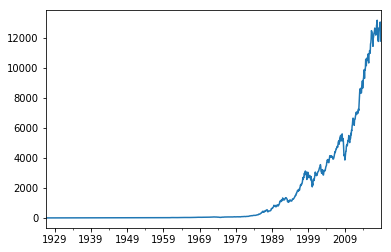

In [14]:
wealth_index.plot()

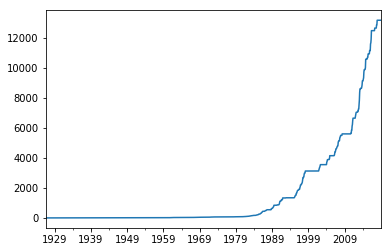

In [15]:
previous_peaks=wealth_index.cummax()
previous_peaks.plot()

In [16]:
previous_peaks

1926-07        1.005600
1926-08        1.031645
1926-09        1.043612
1926-10        1.043612
1926-11        1.075919
               ...     
2018-08    13161.035989
2018-09    13161.035989
2018-10    13161.035989
2018-11    13161.035989
2018-12    13161.035989
Freq: M, Name: Food, Length: 1110, dtype: float64

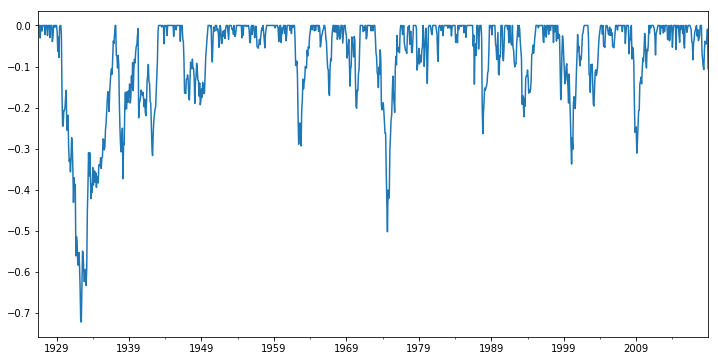

In [17]:
drawdowns=(wealth_index-previous_peaks)/previous_peaks
drawdowns.plot(figsize=(12,6))

In [18]:
drawdowns.min()

-0.7221855547819795

### OR we can do it directly by:

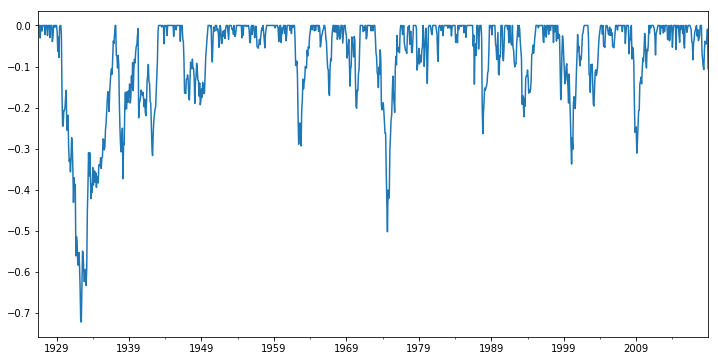

In [19]:
drawdowns1=ak.drawdown(ind["Food"])["Drawdown"]
drawdowns1.plot(figsize=(12,6))

In [20]:
drawdowns1.min()

-0.7221855547819795

#### Now, lets compute VaRs for the different industries that we have in our dataset

In [21]:
ind_var=ak.var_corfish(ind).sort_values(ascending=True)

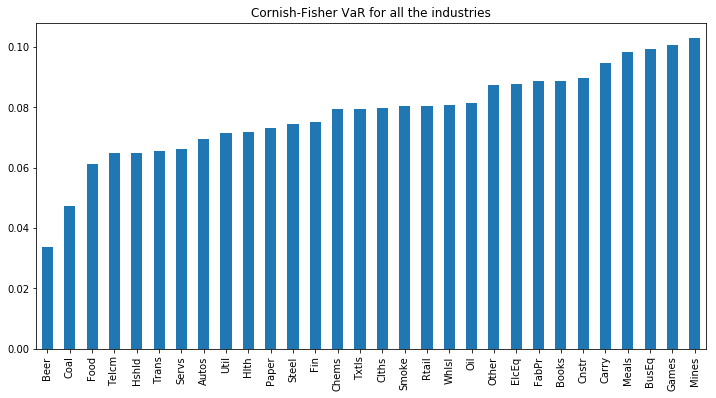

In [22]:
ind_var.plot(kind="bar", title="Cornish-Fisher VaR for all the industries", figsize=(12,6))

#### Which industry has the higest Corn-fish VaR?

In [23]:
ind_var.idxmax()

'Mines'

#### How much?

In [24]:
ind_var.max()

0.10278216214434804

##### BTW, this is 10.27% loss on a monthly basis

#### We have to compute these descriptive stats like mean, std, SR etc. so much in the future. That is why, instead of writing the full code everytime here, lets update those in our toolkit

##### Now that we have updates, lets calculate some of those metrics

### Annualized returns of industries

In [25]:
%autoreload

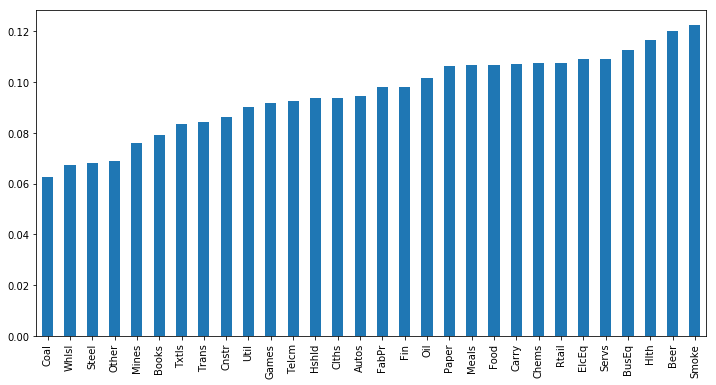

In [26]:
ak.annualize_rets(ind,12).sort_values().plot(kind="bar", figsize=(12,6))

#### Annualized volatility of the industries

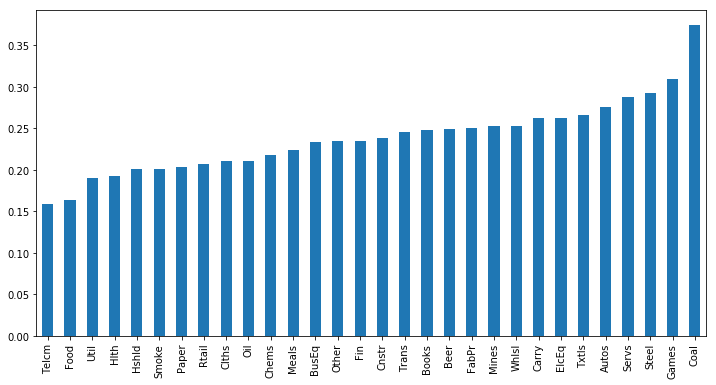

In [27]:
vol_ann=ak.annualize_vol(ind, 12).sort_values()
vol_ann.plot(kind="bar", figsize=(12,6))

In [28]:
vol_ann.tail()

Autos    0.275035
Servs    0.288004
Steel    0.292022
Games    0.308881
Coal     0.373938
dtype: float64

#### If you were to argue that standard deviation is not the right measure, you can use semi-deviation

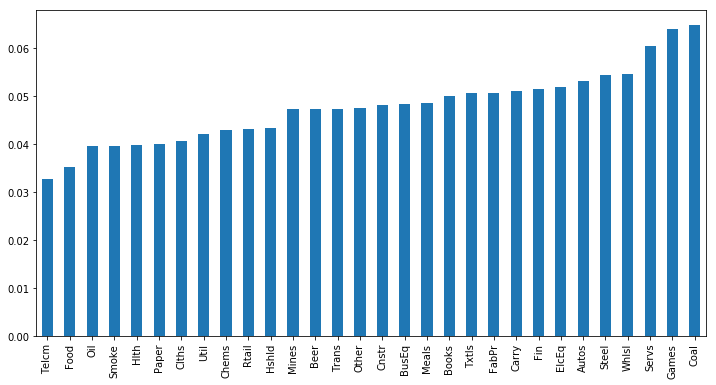

In [29]:
sem_dev=ak.semideviation(ind).sort_values()
sem_dev.plot(kind="bar", figsize=(12,6))

In [30]:
sem_dev.tail()

Steel    0.054259
Whlsl    0.054464
Servs    0.060342
Games    0.063876
Coal     0.064684
dtype: float64

#### The standard dev and semi dev seems to be overlapping in this case

### Sharpe Ratio of the industries

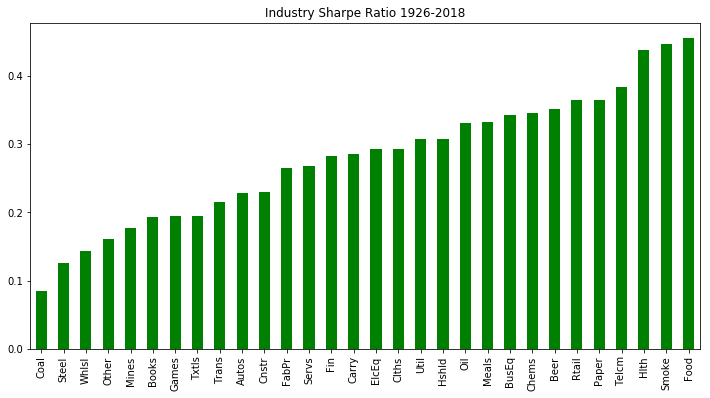

In [31]:
sr_ind=ak.sharpe_ratio(ind, 0.03, 12).sort_values()
sr_ind.plot(figsize=(12,6), kind="bar", title="Industry Sharpe Ratio 1926-2018", color="g")

#### So the coal's risk adjusted returns is pretty dismal. This is due to high vol and low avg returns.

#### If you wanna compute SRs year 2000 onwards

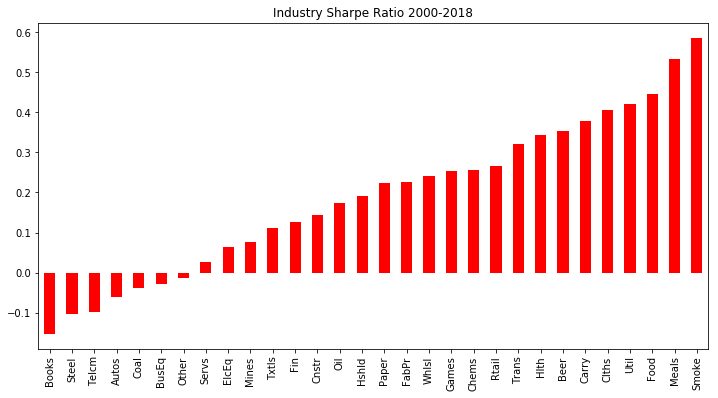

In [32]:
sr_ind_sample=ak.sharpe_ratio(ind["2000":], 0.03, 12).sort_values()
sr_ind_sample.plot(figsize=(12,6), kind="bar", title="Industry Sharpe Ratio 2000-2018", color="r")

#### We can see that when we select a specific sample from the full sample, there are some industries that turns out have a negative SRs

## Efficient frontier

#### To compute an efficient frontier, we need two sets of things:

##### i) set of expected returns
##### ii) covariance matrix (vol and correlation coeff/covariance is embedded here)

#### Expected returns is a bit tricky because we have no idea what the future holds. So, in our case, all we can do is an in-sample exercise and treat the actual realized return as expected returns. 

#### IOW, we are saying "lets look at what the efficient frontier WAS over that period"

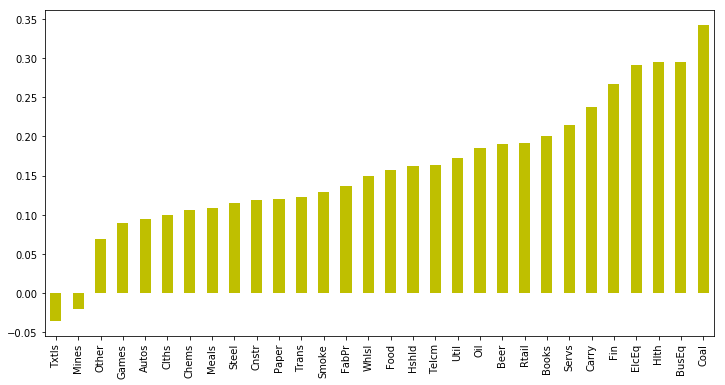

In [33]:
er=ak.annualize_rets(ind["1995":"2000"], 12).sort_values()
er.plot(kind="bar", figsize=(12,6), color="y")

### Time for the covar matrix

In [34]:
cov=ind["1995":"2000"].cov()

# ...............................................................................................................................

# Efficient Frontier Part 2

In [35]:
ind=ak.get_ind_returns()
er=ak.annualize_rets(ind["1996":"2000"],12)
cov=ind["1996":"2000"].cov()

In [36]:
def portfolio_return(weights, returns):
    """
    Weights->> to ->> returns
    """
    return weights.T @ returns   # weight vector transposed and multiplied by the returns vector


def portfolio_vol(weights, covmat):
    
    """
    weights ->> vol
    """
    return (weights.T @ covmat @ weights)**0.5

In [37]:
l=["Food","Beer","Smoke","Coal"]
er[l]

Food     0.116799
Beer     0.141126
Smoke    0.107830
Coal     0.414689
dtype: float64

In [38]:
cov.loc[l,l] # .iloc gives you the index location by integers whereas .loc gives you the index location by 
                                                                                # the index (rows or columns)

,Food,Beer,Smoke,Coal
Food,0.002609,0.002379,0.002061,0.000027
Beer,0.002379,0.005264,0.001359,0.001728
Smoke,0.002061,0.001359,0.008349,-0.000733
Coal,0.000027,0.001728,-0.000733,0.018641


#### Lets check whether the function we wrote works by plugging some weights to calculate the portfolio returns

In [39]:
import numpy as np
%autoreload

In [40]:
weights=np.repeat(0.25, 4)
weights

array([0.25, 0.25, 0.25, 0.25])

In [41]:
ak.portfolio_return(weights, er[l])

0.19511097196038385

In [42]:
ak.portfolio_vol(weights, cov.loc[l,l])

0.055059195776437045

### Lets start with a 2 asset frontier

In [43]:
# First pick our assets

l=["Games", "Fin"]
er[l]

Games    0.068212
Fin      0.223371
dtype: float64

Now, we are gonna generate a series of weights in which the first weight vector would be 100% in Games and the last weight vector would be 100% in Fin. The rest of the vector weights would be somewhere between these two.

In [44]:
n_points= 20 # We wanna generate 20 points. Here, each vector weight represents 1 point.

#### New terminology alert: List comprehension

List comprehension is simply a way of generating a list. 

In [45]:
# Each element in our list i.e inside this [] brackets is basically a weight vector. And, we already know that the weight vector
# is nothing but an array of weights

weights=[np.array([w, 1-w]) for w in np.linspace(0,1, n_points)] # linspace is just lineraly(equally) spaced points bet 2 numbers

In [46]:
weights

[array([0., 1.]),
 array([0.05263158, 0.94736842]),
 array([0.10526316, 0.89473684]),
 array([0.15789474, 0.84210526]),
 array([0.21052632, 0.78947368]),
 array([0.26315789, 0.73684211]),
 array([0.31578947, 0.68421053]),
 array([0.36842105, 0.63157895]),
 array([0.42105263, 0.57894737]),
 array([0.47368421, 0.52631579]),
 array([0.52631579, 0.47368421]),
 array([0.57894737, 0.42105263]),
 array([0.63157895, 0.36842105]),
 array([0.68421053, 0.31578947]),
 array([0.73684211, 0.26315789]),
 array([0.78947368, 0.21052632]),
 array([0.84210526, 0.15789474]),
 array([0.89473684, 0.10526316]),
 array([0.94736842, 0.05263158]),
 array([1., 0.])]

In [47]:
len(weights)

20

#### Now that we have a sequence of weights, all we got to do is for every weight combination we have to figure out what is the corresponding return and volatility to that particular weight combo

In [48]:
l # Assets we are gonna invest in

['Games', 'Fin']

#### List of the returns corresponding to each of the weight combo

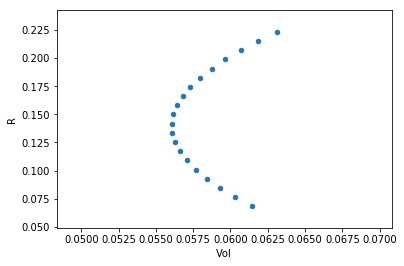

In [49]:
rets=[ak.portfolio_return(w,er[l]) for w in weights]
vols=[ak.portfolio_vol(w,cov.loc[l,l]) for w in weights]
ef=pd.DataFrame({"R":rets, "Vol":vols})
ef.plot.scatter(x="Vol",y="R")

In [50]:
ef.head()

,R,Vol
0,0.223371,0.063100
1,0.215205,0.061845
2,0.207039,0.060699
3,0.198873,0.059666
4,0.190706,0.058753


In [51]:
l=["Fin", "Beer"]
er[l]

Fin     0.223371
Beer    0.141126
dtype: float64

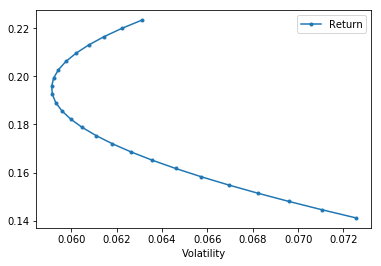

In [52]:
ak.plot_ef2(25, er[l], cov.loc[l,l])

### N Asset Efficient frontier

In [53]:
from scipy.optimize import minimize

In [54]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import analysis_kit as ak

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [55]:
ind=ak.get_ind_returns()
er=ak.annualize_rets(ind["1996":"2000"], 12)
cov=ind["1996":"2000"].cov()

## Lets first focus on obtaining the optimal weights. 
### The qudratic optimizer aims to obtain these optimal weights by minimizing the volatility for a given level of target return.

def minimize_vol(target_return, er, cov):
    
    """
    target_return -> W
    """
    n=er.shape[0]
    init_guess= np.repeat(1/n, n)
    bounds=((0.0, 1.0),)*n
    return_is_target={
        "type":"eq",
        "args":(er,),
        "fun": lambda weights, er: target_return-ak.portfolio_return(weights, er) }
    weights_sum_to_1={
        "type":"eq",
        "fun": lambda weights: np.sum(weights)-1}
    results= minimize(ak.portfolio_vol,init_guess, args=(cov,), method="SLSQP",
                options={"disp":False},
                constraints=(return_is_target, weights_sum_to_1),
                bounds=bounds)
    return results.x

### In the above code, we have laid out some constraints that the optimizer has to follow while it performs the computation of finding out the optimal set of weights for a given target return and covariance matrix

#### Now, lets actually find out what those optimal weights actually are

In [56]:
l=["Games", "Fin"]
er[l]

Games    0.068212
Fin      0.223371
dtype: float64

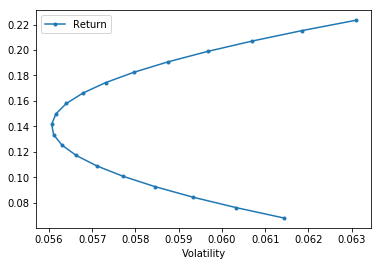

In [57]:
ak.plot_ef2(20, er[l],cov.loc[l,l])

Now, if we see the above plot, what we shall find is that "if 15% is our target return, then the optimal weights assignied by the frontier has yielded 5.6% volatility. 

#### Note this 5.6% vol is the best possible vol. YOu cannot do better than this.

### We can take these numbers and check whether our optimizer returns similar vol and weights for 15% target return

In [58]:
w15=ak.minimize_vol(15,er[l],cov.loc[l,l]) # This will give us some set of weights
vol15= ak.portfolio_vol(w15,cov.loc[l,l])
vol15 # As you can see, the vol spitted out by the optimizer is exactly 5.6%. This is a sign that the optimizer worked.

0.056244675036622706

In [59]:
# Let check the weights out

w15

array([0.45166586, 0.54833414])

### IOW, this means that there is no other way than the above comb of weights that these two assets i.e Games and Fin get a portfolio vol that is less than 5.6%

In [60]:
def optimal_weights(n_points, er, cov):
    """
    Generates a list of weights to run the optimizer on to minimize the vol
    """
    
    target_rs=np.linspace(er.min(), er.max(), n_points) # First generating list of target returns to feed the optimizer that will
                                                        # eventually use this info to compute optimal weights
    
    # We previously had written a code to generate optimal weights. However, that was for 1 set of weights but now, we need 
    # a series of weights from the series of target returns given by the above variable
    
    weights=[minimize_vol(target_return, er, cov) for target_return in target_rs] # This code is basically saying " Loop through
                                                            # every one of "target_rs" series, run the optimizer on every one of 
                                                    # "target_return" and give me back the set of optimal weights
    return weights
    
def plot_ef(n_points, er, cov):
    
    """
    Plots the 2 asset eff frontier
    """
    
    weights=optimal_weights(n_points, er, cov) # linspace is just lineraly(equally) spaced points bet 2 numbers
    rets=[ak.portfolio_return(w, er) for w in weights]
    vols=[ak.portfolio_vol(w, cov) for w in weights]
    ef=pd.DataFrame({"Returns":rets, "Volatility":vols})
    
    return ef.plot.line(x="Volatility",y="Returns", style=".-")

l=["Smoke","Fin","Games","Coal"]
plot_ef(25, er[l], cov.loc[l,l])

## OR

In [61]:
%autoreload

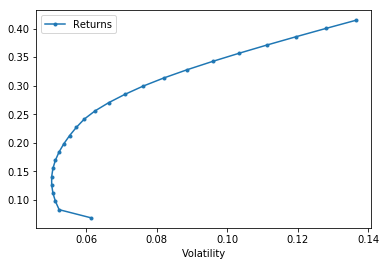

In [62]:
l=["Smoke","Fin","Games","Coal"]
ak.plot_ef(25, er[l], cov.loc[l,l])

### Finding the Max Sharpe Ratio Portfolio

#### We gonna finally compute that one portfolio that gives us the maximum sharpe ratio

In [63]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import analysis_kit as ak
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [64]:
ind= ak.get_ind_returns()
er= ak.annualize_rets(ind["1996":"2000"], 12)
cov=ind["1996":"2000"].cov()

In [65]:
from scipy.optimize import minimize

#### Do you remember the code that we had previously which was used to find the minimum vol portfolio given a particular target return? 

Actually I do. Are you talking about this?

def minimize_vol(target_return, er, cov):
    n=er.shape[0]
    init_guess=np.repeat(1/n,n)
    bounds=(0.0,1.0) * n
    return_is_target={
            "typ":"eq",
            "args":(er,),
            "fun": lambda weights, er: target_return-ak.portfolio_return(weights, er)
    }
    weights_sum_to_1={
    
             "typ":"eq",
             "fun":lambda weights: np.sum(target_returns)-1
    }
    
    results=minimize(ak.portfolio_vol, init_guess, args=(er,), option={"disp":False}, method="SLSQP",
                     constraints=(return_is_target, weights_sum_to_1), bounds=bounds)
                     
    return results.x

def optimal_weights(n_points, er, cov):
           
           target_rs=np.linspace(er.min(), er.max(), n_points)
           weights=[minimize_vol(target_return, er, cov) for target_return in target_rs]
           return weights

def ef_plot(n_points, er, cov):
            
            weights=optimal_weights(n_points, er, cov)
            rets=[ak.portfolio_return(w, er) for w in weights]
            vol=[ak.porfolio_vol(w, cov) for w in weights]
            ef=pd.DataFrame({"Returns":rets, "Volatility":vol})
            
            return ef.plot.line(x="Returns", y="Volatility", style=".-")

#### Yes, exactly this one

Alright, so now, what then? I mean how do we compute the maximum possible sharpe ratio (MSR)?

#### The process to calculate MSR is actually very very similar to the above code for minimizing the vol of the portfolios. We just need a slight bit of modification

def msr(rf_rate, er, cov):  # Change-> removed target return and replace it with rf_rate. It is basically saying that the msr
                            #portfolio is a function of rf_rate
        """
        Risk free rate + ER + COV -> W
        """
        n=er.shape[0]
        init_guess=np.repeat(1/n, n)
        bounds=((0.0,1.0),)*n
        
        #We are not targetting any returns right now so that is why there shall be no "return_is_target" constraint
        
        #However, we still want the weights to sum to 1
        
        weights_sum_to_1 = {
            "type":"eq",
            "fun": lambda weights: np.sum(weights)-1
        }
        
        #Note that we are not trying to minimize the portfolio volatility. We are rather trying to maximize the Sharpe ratio.
        #This is why in the code below, the objective function is gonna change. Instead of "minimize(ak.portfolio_vol)", it 
        #shall be "minimize(neg_sharpe_ratio)". 
        
        #The logic here is that if we minimize the negative sharpe ratio, we shall automatically be maximizing the sharpe 
        #ratio
        #So, therefore now, lets define the neg_sharpe_ratio function
        
        def neg_sharpe_ratio(weights, rf_rate, er, cov):
            """
            Returns the negative of the Sharpe ratio, given weights
            """
            
            rets= ak.portfolio_return(weights, er)
            vol= ak.portfolio_vol(weights, cov)
            
            return -(rets-rf_rate)/vol
        
        results= minimize(neg_sharpe_ratio, init_guess, args=(rf_rate,er,cov,), method="SLSQP",
                         options={"disp":False}, constraints=(weights_sum_to_1), bounds=bounds
                         )
        return results.x

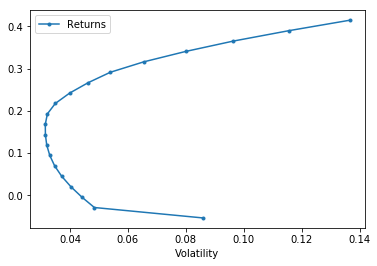

In [67]:
ak.plot_ef(20, er, cov)

#### Modifying the plot in order to make room for CML

(0, 0.14178366279825347)

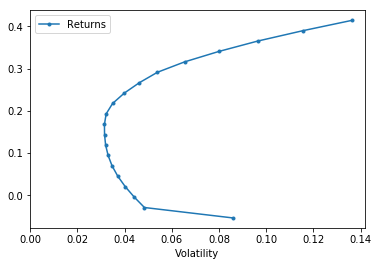

In [68]:
ax=ak.plot_ef(20,er,cov)
ax.set_xlim(left=0) # By doing this, we are basically asking matplotlib to plot in a way that the x-axis starts from 0

#### Now, let us introduce a line i.e. CML that is tangent to the max sharpe ratio portfolio

ax=ak.plot_ef(20, er, cov)
ax.set_xlim(left=0)
rf=0.1 # We are assuming the rf is 10%
w_msr=msr(rf, er, cov)
r_msr=ak.portfolio_return(w_msr, er)
vol_msr=ak.portfolio_vol(w_msr, cov)

#Add CML

cml_x= [0, vol_msr] # coz at the rf rate at the axis vol is 0. Similarly, "vol_msr" coz at the tangency portfolio, the vol is
                    #whatever the volatility is of the msr portfolio

cml_y= [rf, r_msr] # coz at the start, the returns for rf_rate is 10% and as it moves and goes to the other end, the 
                        #returns shall be the returns provided by r_msr

ax.plot(cml_x, cml_y, color="green", marker="o", linestyle="dashed")

#### Lets use our tool kit to map the eff frontier and the cml

In [79]:
%autoreload

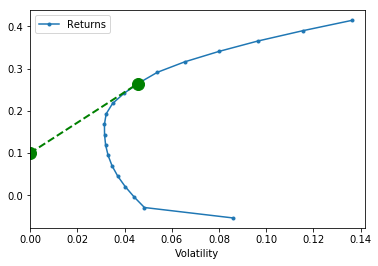

In [83]:
ak.plot_ef(20, er, cov, show_cml=True, rf_rate=0.1)